## 2) Data and Model Drift

### Monthly features is taken for modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
pd.options.mode.chained_assignment = None 

In [2]:
monthly_features_outputs = pd.read_excel('monthly_features_outputs.xlsx')

In [3]:
monthly_features_outputs

,Unnamed: 0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,51,0
1,1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,1,15,0
2,2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,...,NaN,0,0,0,0,0,0,0,46,0
3,3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,...,NaN,1,0,0,0,0,0,0,12,0
4,4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,...,NaN,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,98,0
323544,323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,129,0
323545,323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0,0,0,0,0,0,0,160,0
323546,323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,...,1.0,0,0,1,0,0,0,0,0,0


In [4]:
monthly_features_outputs = monthly_features_outputs.apply(lambda x: x.fillna(0),axis=0)

In [5]:
monthly_features_outputs['ME_DT'].min()

Timestamp('2011-05-31 00:00:00')

In [6]:
monthly_features_outputs['ME_DT'].max()

Timestamp('2015-03-31 00:00:00')

### Preparing Data prior to December 2013 to train the model

In [7]:
X2 = monthly_features_outputs[(monthly_features_outputs['ME_DT'] <= '2013-12-31')]

In [8]:
X2 = X2.drop(['Unnamed: 0','CLNT_NO'],axis=1)
X2

,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0,0,0,0,0,0,0,51,0
1,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0,0,0,0,0,0,1,15,0
2,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,0.0,...,0.0,0,0,0,0,0,0,0,46,0
3,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,0.0,...,0.0,1,0,0,0,0,0,0,12,0
4,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,0.0,...,0.0,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323528,2013-08-31,0,0,76.0,25.333333,76.0,1.0,0.333333,1.0,76.0,...,1.0,0,0,0,0,0,0,0,47,0
323529,2013-09-30,0,0,76.0,25.333333,76.0,1.0,0.333333,1.0,76.0,...,1.0,0,0,0,0,0,0,0,77,0
323530,2013-10-31,71,1,71.0,23.666667,71.0,1.0,0.333333,1.0,147.0,...,1.0,0,0,0,0,0,1,0,30,0
323531,2013-11-30,0,0,71.0,23.666667,71.0,1.0,0.333333,1.0,147.0,...,1.0,0,0,0,0,0,0,0,60,0


In [9]:
df = X2

In [10]:
y2 = X2['response']

In [11]:
X2 = X2.drop(['response','ME_DT'],axis=1)

In [12]:
y2.value_counts()

0    199584
1     20704
Name: response, dtype: int64

In [13]:
X_train = X2
y_train = y2

### Preparing Data after December 2013 to test the model

In [14]:
X3 = monthly_features_outputs[(monthly_features_outputs['ME_DT'] > '2013-12-31')]

In [15]:
X3 = X3.drop(['Unnamed: 0','CLNT_NO'],axis=1)
X3

,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
32,2014-01-31,0,0,71.0,23.666667,71.0,1.0,0.333333,1.0,71.0,...,1.0,0,0,0,0,0,0,0,79,0
33,2014-02-28,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,71.0,...,1.0,0,0,0,0,0,0,0,107,0
34,2014-03-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,71.0,...,1.0,0,0,0,0,0,0,0,138,0
35,2014-04-30,63,1,63.0,21.000000,63.0,1.0,0.333333,1.0,134.0,...,1.0,0,0,0,0,0,1,0,1,0
36,2014-05-31,0,0,63.0,21.000000,63.0,1.0,0.333333,1.0,63.0,...,1.0,0,0,0,0,0,0,0,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,...,1.0,0,0,0,0,0,0,0,98,0
323544,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,...,1.0,0,0,0,0,0,0,0,129,0
323545,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,...,1.0,0,0,0,0,0,0,0,160,0
323546,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,...,1.0,0,0,1,0,0,0,0,0,0


In [16]:
df1 = X3

In [17]:
y3 = X3['response']

In [18]:
X3 = X3.drop(['response','ME_DT'],axis=1)

In [19]:
y3.value_counts()

0    93555
1     9705
Name: response, dtype: int64

In [20]:
X_test = X3
y_test = y3

### The optimum/best random forest model for tuning of data prior to 2013 December

In [21]:
best_RF = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=1148)

In [22]:
best_RF.fit(X_train, y_train)
Train_Error_RF = best_RF.score(X_train, y_train)
Test_Error_RF = best_RF.score(X_test, y_test)

print('Train Mean Accuracy:', round(Train_Error_RF,2))
print('Test Mean Accuracy:', round(Test_Error_RF,2))

Train Mean Accuracy: 0.91
Test Mean Accuracy: 0.91


In [23]:
scores_train = best_RF.predict_proba(X_train)[:,1]

In [24]:
scores_train

array([0.08460479, 0.08740668, 0.08308544, ..., 0.06773854, 0.06619145,
       0.0679414 ])

In [25]:
scores_test  = best_RF.predict_proba(X_test)[:,1]  
scores_test

array([0.08774477, 0.0836272 , 0.05073328, ..., 0.03674511, 0.03277038,
       0.03277038])

**Overall/total drift for the model**

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

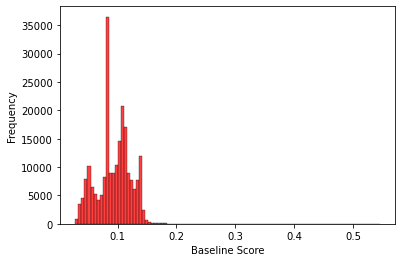

In [26]:
ax = sns.histplot(scores_train,                
                  color='red',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

In [27]:
np.histogram(scores_train)

(array([ 56109, 140194,  23805,    122,     35,      6,      9,      2,
             4,      2], dtype=int64),
 array([0.02803711, 0.07978114, 0.13152517, 0.1832692 , 0.23501323,
        0.28675726, 0.33850129, 0.39024532, 0.44198935, 0.49373338,
        0.54547741]))

In [28]:
bin_edges = np.quantile(scores_train, np.arange(0, 1.1, 0.1))
bin_edges[0]=0 # We replace the first element with zero since it's the lower cap
bin_edges

array([0.        , 0.0510112 , 0.07055336, 0.08308544, 0.08460479,
       0.0950964 , 0.10449161, 0.11042962, 0.11760168, 0.1333565 ,
       0.54547741])

In [29]:
p = np.histogram(scores_train, bin_edges)
p

(array([21830, 21996, 21098,  4647, 40568, 22016, 21965, 22110, 22026,
        22032], dtype=int64),
 array([0.        , 0.0510112 , 0.07055336, 0.08308544, 0.08460479,
        0.0950964 , 0.10449161, 0.11042962, 0.11760168, 0.1333565 ,
        0.54547741]))

[Text(0.5, 0, 'Target Score'), Text(0, 0.5, 'Frequency')]

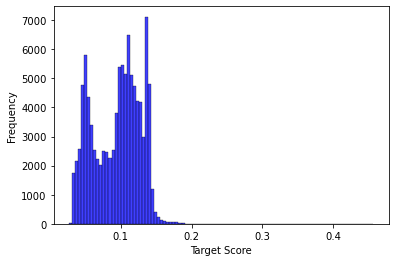

In [30]:
ax = sns.histplot(scores_test,                
                  color='blue',
                  bins=100)
ax.set(xlabel='Target Score', ylabel='Frequency')

In [31]:
q = np.histogram(scores_test, bin_edges)
q

(array([15123, 14905,  7006,   799,  7047, 11807,  7478,  9240, 14811,
        15044], dtype=int64),
 array([0.        , 0.0510112 , 0.07055336, 0.08308544, 0.08460479,
        0.0950964 , 0.10449161, 0.11042962, 0.11760168, 0.1333565 ,
        0.54547741]))

In [32]:
q[0]

array([15123, 14905,  7006,   799,  7047, 11807,  7478,  9240, 14811,
       15044], dtype=int64)

In [33]:
from scipy.spatial import distance
distance.jensenshannon(p[0], q[0], 2.0)

0.1956400362680422

From the above jensonshannon value, it is evident that there is a drift in the production scores compared to the Baseline distribution.

In [34]:
scores_train.shape

(220288,)

### To calculate the drift value of the scores month over month

In [35]:
scores_train_df = pd.DataFrame(scores_train)
scores_train_df = scores_train_df.set_axis(['scores_train'], axis=1)

In [36]:
#scores_train_df

In [37]:
scores_test_df = pd.DataFrame(scores_test)
scores_test_df = scores_test_df.set_axis(['scores_test'], axis=1)

In [38]:
#scores_test_df

In [39]:
X4 = monthly_features_outputs[(monthly_features_outputs['ME_DT'] > '2013-12-31')]

In [40]:
X4 = X4.drop(columns=['Unnamed: 0'],axis=1)

In [41]:
X4

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
32,CS1112,2014-01-31,0,0,71.0,23.666667,71.0,1.0,0.333333,1.0,...,1.0,0,0,0,0,0,0,0,79,0
33,CS1112,2014-02-28,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,107,0
34,CS1112,2014-03-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,138,0
35,CS1112,2014-04-30,63,1,63.0,21.000000,63.0,1.0,0.333333,1.0,...,1.0,0,0,0,0,0,1,0,1,0
36,CS1112,2014-05-31,0,0,63.0,21.000000,63.0,1.0,0.333333,1.0,...,1.0,0,0,0,0,0,0,0,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,98,0
323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,129,0
323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,160,0
323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [42]:
X4 = X4.reset_index()
X4 = X4.drop(columns=['index'],axis=1)

In [43]:
merge_df = X4.join(scores_train_df)

In [44]:
merge_df = merge_df.join(scores_test_df)

In [45]:
from datetime import datetime as dt
merge_df['date'] = pd.to_datetime(merge_df['ME_DT'])
merge_df['date'] = merge_df['date'].dt.strftime('%Y-%m')

In [46]:
merge_df = merge_df.apply(lambda x: x.fillna(0),axis=0)

In [47]:
merge_df = merge_df.drop(columns=['ME_DT'],axis=1)

In [48]:
merge_df = merge_df[['CLNT_NO','date', 'scores_train','scores_test']]
merge_df

,CLNT_NO,date,scores_train,scores_test
0,CS1112,2014-01,0.084605,0.087745
1,CS1112,2014-02,0.087407,0.083627
2,CS1112,2014-03,0.083085,0.050733
3,CS1112,2014-04,0.110266,0.057199
4,CS1112,2014-05,0.110280,0.056076
...,...,...,...,...
103255,CS9000,2014-11,0.115842,0.042209
103256,CS9000,2014-12,0.109000,0.042209
103257,CS9000,2015-01,0.109000,0.036745
103258,CS9000,2015-02,0.120738,0.032770


In [49]:
merge_df_train_test = merge_df.groupby(['date','CLNT_NO']).mean()

In [50]:
merge_df_train_test

scores_train  scores_test
date    CLNT_NO                           
2014-01 CS1112       0.084605     0.087745
        CS1113       0.091638     0.097331
        CS1114       0.114490     0.141003
        CS1115       0.103670     0.133940
        CS1116       0.133827     0.065781
...                       ...          ...
2015-03 CS8996       0.132738     0.118021
        CS8997       0.140248     0.043859
        CS8998       0.125820     0.050104
        CS8999       0.118050     0.034869
        CS9000       0.098134     0.032770

[103260 rows x 2 columns]

In [51]:
monthly_scores_train = merge_df_train_test['scores_train'].groupby(level=0).aggregate(np.histogram)
#monthly_scores_train

In [52]:
monthly_scores_train = pd.DataFrame(monthly_scores_train)
monthly_scores_train

,scores_train
date,
2014-01,"([329, 714, 2325, 2396, 1080, 33, 2, 1, 1, 3],..."
2014-02,"([254, 345, 1966, 2591, 1509, 196, 17, 3, 2, 1..."
2014-03,"([1815, 4391, 672, 4, 1, 0, 0, 0, 0, 1], [0.03..."
2014-04,"([426, 2680, 3355, 412, 7, 0, 3, 0, 0, 1], [0...."
2014-05,"([590, 4448, 1815, 27, 0, 2, 0, 1, 0, 1], [0.0..."
2014-06,"([430, 2225, 3221, 989, 15, 3, 0, 0, 0, 1], [0..."
2014-07,"([569, 4040, 2213, 58, 2, 1, 0, 0, 0, 1], [0.0..."
2014-08,"([375, 1639, 2859, 1873, 124, 13, 0, 0, 0, 1],..."
2014-09,"([502, 2958, 3236, 172, 10, 3, 0, 1, 1, 1], [0..."


In [53]:
monthly_scores_test = merge_df_train_test['scores_test'].groupby(level=0).aggregate(np.histogram)
monthly_scores_test = pd.DataFrame(monthly_scores_test)
#monthly_scores_test

In [54]:
join_df = monthly_scores_train.join(monthly_scores_test)
#join_df

In [55]:
u = join_df.apply(lambda x: x.str[0])
u

,scores_train,scores_test
date,,
2014-01,"[329, 714, 2325, 2396, 1080, 33, 2, 1, 1, 3]","[1664, 1033, 2416, 1715, 49, 6, 0, 0, 0, 1]"
2014-02,"[254, 345, 1966, 2591, 1509, 196, 17, 3, 2, 1]","[1666, 1065, 2455, 1643, 47, 4, 1, 2, 0, 1]"
2014-03,"[1815, 4391, 672, 4, 1, 0, 0, 0, 0, 1]","[2100, 2686, 2067, 25, 4, 1, 0, 0, 0, 1]"
2014-04,"[426, 2680, 3355, 412, 7, 0, 3, 0, 0, 1]","[1243, 1025, 1463, 1910, 1200, 38, 3, 0, 0, 2]"
2014-05,"[590, 4448, 1815, 27, 0, 2, 0, 1, 0, 1]","[1252, 1059, 1504, 1973, 1062, 30, 1, 2, 0, 1]"
2014-06,"[430, 2225, 3221, 989, 15, 3, 0, 0, 0, 1]","[1048, 981, 820, 1794, 1362, 850, 21, 5, 2, 1]"
2014-07,"[569, 4040, 2213, 58, 2, 1, 0, 0, 0, 1]","[886, 1033, 677, 1437, 1544, 1222, 68, 12, 4, 1]"
2014-08,"[375, 1639, 2859, 1873, 124, 13, 0, 0, 0, 1]","[1483, 1048, 2036, 2090, 209, 15, 1, 1, 0, 1]"
2014-09,"[502, 2958, 3236, 172, 10, 3, 0, 1, 1, 1]","[1020, 1020, 793, 1714, 1366, 931, 27, 9, 1, 3]"


In [56]:
for i in range(len(u)):
    u['JS_values'] = distance.jensenshannon(u['scores_train'].values[i],u['scores_test'].values[i],2.0)

In [57]:
for i in range(len(u)):
    u['JS_values'][i] = distance.jensenshannon(u['scores_train'].values[i],u['scores_test'].values[i],2.0)
u

,scores_train,scores_test,JS_values
date,,,
2014-01,"[329, 714, 2325, 2396, 1080, 33, 2, 1, 1, 3]","[1664, 1033, 2416, 1715, 49, 6, 0, 0, 0, 1]",0.350130
2014-02,"[254, 345, 1966, 2591, 1509, 196, 17, 3, 2, 1]","[1666, 1065, 2455, 1643, 47, 4, 1, 2, 0, 1]",0.446724
2014-03,"[1815, 4391, 672, 4, 1, 0, 0, 0, 0, 1]","[2100, 2686, 2067, 25, 4, 1, 0, 0, 0, 1]",0.250823
2014-04,"[426, 2680, 3355, 412, 7, 0, 3, 0, 0, 1]","[1243, 1025, 1463, 1910, 1200, 38, 3, 0, 0, 2]",0.492806
2014-05,"[590, 4448, 1815, 27, 0, 2, 0, 1, 0, 1]","[1252, 1059, 1504, 1973, 1062, 30, 1, 2, 0, 1]",0.583789
2014-06,"[430, 2225, 3221, 989, 15, 3, 0, 0, 0, 1]","[1048, 981, 820, 1794, 1362, 850, 21, 5, 2, 1]",0.534290
2014-07,"[569, 4040, 2213, 58, 2, 1, 0, 0, 0, 1]","[886, 1033, 677, 1437, 1544, 1222, 68, 12, 4, 1]",0.660421
2014-08,"[375, 1639, 2859, 1873, 124, 13, 0, 0, 0, 1]","[1483, 1048, 2036, 2090, 209, 15, 1, 1, 0, 1]",0.230456
2014-09,"[502, 2958, 3236, 172, 10, 3, 0, 1, 1, 1]","[1020, 1020, 793, 1714, 1366, 931, 27, 9, 1, 3]",0.618721


In [58]:
u_df = u.reset_index()

<AxesSubplot:xlabel='date'>

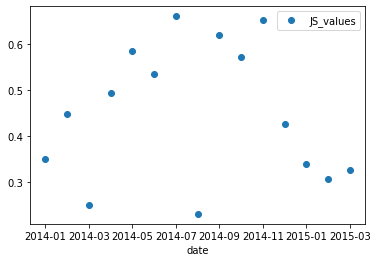

In [59]:
u_df.plot(x='date', y='JS_values', style='o')

### Plot the feature importance and extract the top 5 features

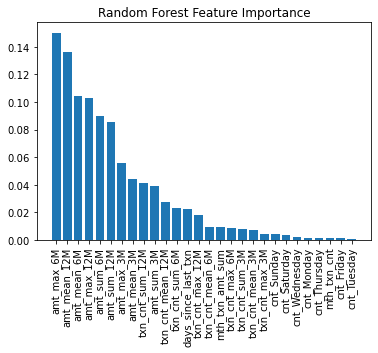

In [60]:
importances = best_RF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X2.columns [i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Random Forest Feature Importance")
# Add bars
plt.bar(range(X2.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X2.shape[1]), names, rotation=90)
plt.show()

From the above plot, the top 5 features are:<br>
1) amt_max_6M
2) amt_mean_12M
3) amt_mean_6M
4) amt_max_12M
5) amt_sum_6M <br>

We have to calculate the drift values per month for all the top 5 features

## 1) amt_max_6M

In [61]:
amt_max_6M_baseline = X2['amt_max_6M'].to_numpy()

In [62]:
amt_max_6M_baseline = amt_max_6M_baseline/amt_max_6M_baseline.max()
amt_max_6M_baseline

array([0.        , 0.        , 0.        , ..., 0.18357488, 0.18357488,
       0.18357488])

**Overall drift for all the months together**

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

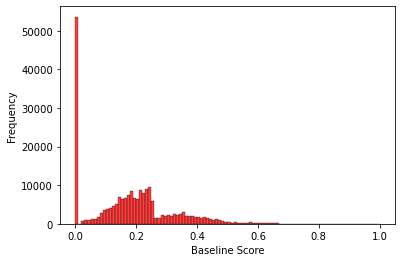

In [63]:
ax = sns.histplot(amt_max_6M_baseline,                
                  color='red',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

In [64]:
amt_max_6M_target = X3['amt_max_6M'].to_numpy()
amt_max_6M_target = amt_max_6M_target/amt_max_6M_target.max()

In [65]:
amt_max_6M_target

array([0.15434783, 0.15434783, 0.15434783, ..., 0.07608696, 0.07391304,
       0.07391304])

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

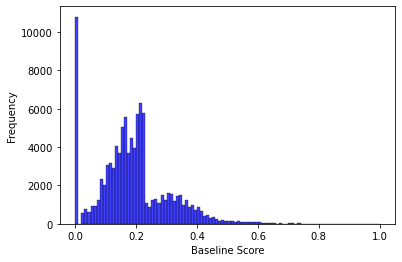

In [66]:
ax = sns.histplot(amt_max_6M_target,                
                  color='blue',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

### To estimate the drift month over month

In [67]:
amt_max_6M_baseline_df = pd.DataFrame(amt_max_6M_baseline)
amt_max_6M_baseline_df = amt_max_6M_baseline_df.set_axis(['amt_max_6M_baseline'], axis=1)

In [68]:
amt_max_6M_target_df = pd.DataFrame(amt_max_6M_target)
amt_max_6M_target_df = amt_max_6M_target_df.set_axis(['amt_max_6M_target'], axis=1)

In [69]:
merge_df = X4.join(amt_max_6M_baseline_df)
merge_df = merge_df.join(amt_max_6M_target_df)

In [70]:
from datetime import datetime as dt
merge_df['date'] = pd.to_datetime(merge_df['ME_DT'])
merge_df['date'] = merge_df['date'].dt.strftime('%Y-%m')

In [71]:
merge_df = merge_df.apply(lambda x: x.fillna(0),axis=0)

In [72]:
merge_df = merge_df.drop(columns=['ME_DT'],axis=1)

In [73]:
merge_df = merge_df[['CLNT_NO','date', 'amt_max_6M_baseline','amt_max_6M_target']]

In [74]:
merge_df_train_test = merge_df.groupby(['date','CLNT_NO']).mean()

In [75]:
monthly_scores_train = merge_df_train_test['amt_max_6M_baseline'].groupby(level=0).aggregate(np.histogram)
#monthly_scores_train

In [76]:
monthly_scores_train = pd.DataFrame(monthly_scores_train)

In [77]:
monthly_scores_test = merge_df_train_test['amt_max_6M_target'].groupby(level=0).aggregate(np.histogram)
monthly_scores_test = pd.DataFrame(monthly_scores_test)
#monthly_scores_test

In [78]:
join_df = monthly_scores_train.join(monthly_scores_test)

In [79]:
u = join_df.apply(lambda x: x.str[0])
u

,amt_max_6M_baseline,amt_max_6M_target
date,,
2014-01,"[1525, 1020, 2476, 646, 684, 358, 106, 50, 13, 6]","[1165, 2154, 2055, 883, 457, 100, 47, 16, 5, 2]"
2014-02,"[1520, 1049, 2449, 654, 693, 340, 107, 58, 8, 6]","[1217, 2188, 2051, 822, 438, 106, 40, 15, 5, 2]"
2014-03,"[1523, 1069, 2453, 656, 691, 314, 107, 56, 9, 6]","[1221, 2184, 2023, 846, 441, 105, 40, 16, 5, 3]"
2014-04,"[1517, 1054, 2462, 669, 692, 310, 108, 54, 13, 5]","[1278, 2454, 1840, 880, 313, 80, 22, 14, 1, 2]"
2014-05,"[1618, 1379, 2215, 880, 570, 131, 64, 21, 5, 1]","[1273, 2492, 1844, 850, 317, 71, 23, 11, 1, 2]"
2014-06,"[1645, 1398, 2188, 884, 567, 126, 49, 21, 5, 1]","[1276, 2498, 1850, 844, 305, 73, 26, 8, 0, 4]"
2014-07,"[1628, 1441, 2135, 912, 559, 132, 54, 17, 4, 2]","[1307, 2522, 1825, 808, 313, 76, 23, 6, 0, 4]"
2014-08,"[1624, 1464, 2119, 887, 559, 136, 67, 19, 7, 2]","[1281, 2494, 1842, 834, 315, 81, 27, 6, 0, 4]"
2014-09,"[1579, 1454, 2141, 913, 563, 131, 74, 19, 8, 2]","[1289, 2501, 1838, 815, 319, 81, 29, 9, 0, 3]"


In [80]:
for i in range(len(u)):
    u['JS_values'] = distance.jensenshannon(u['amt_max_6M_baseline'].values[i],u['amt_max_6M_target'].values[i],2.0)

In [81]:
for i in range(len(u)):
    u['JS_values'][i] = distance.jensenshannon(u['amt_max_6M_baseline'].values[i],u['amt_max_6M_target'].values[i],2.0)
u

,amt_max_6M_baseline,amt_max_6M_target,JS_values
date,,,
2014-01,"[1525, 1020, 2476, 646, 684, 358, 106, 50, 13, 6]","[1165, 2154, 2055, 883, 457, 100, 47, 16, 5, 2]",0.202907
2014-02,"[1520, 1049, 2449, 654, 693, 340, 107, 58, 8, 6]","[1217, 2188, 2051, 822, 438, 106, 40, 15, 5, 2]",0.197722
2014-03,"[1523, 1069, 2453, 656, 691, 314, 107, 56, 9, 6]","[1221, 2184, 2023, 846, 441, 105, 40, 16, 5, 3]",0.193001
2014-04,"[1517, 1054, 2462, 669, 692, 310, 108, 54, 13, 5]","[1278, 2454, 1840, 880, 313, 80, 22, 14, 1, 2]",0.240739
2014-05,"[1618, 1379, 2215, 880, 570, 131, 64, 21, 5, 1]","[1273, 2492, 1844, 850, 317, 71, 23, 11, 1, 2]",0.164761
2014-06,"[1645, 1398, 2188, 884, 567, 126, 49, 21, 5, 1]","[1276, 2498, 1850, 844, 305, 73, 26, 8, 0, 4]",0.163004
2014-07,"[1628, 1441, 2135, 912, 559, 132, 54, 17, 4, 2]","[1307, 2522, 1825, 808, 313, 76, 23, 6, 0, 4]",0.157683
2014-08,"[1624, 1464, 2119, 887, 559, 136, 67, 19, 7, 2]","[1281, 2494, 1842, 834, 315, 81, 27, 6, 0, 4]",0.153710
2014-09,"[1579, 1454, 2141, 913, 563, 131, 74, 19, 8, 2]","[1289, 2501, 1838, 815, 319, 81, 29, 9, 0, 3]",0.154247


In [82]:
u_df = u.reset_index()

Text(0.5, 1.0, 'JS_values for amt_max_6M')

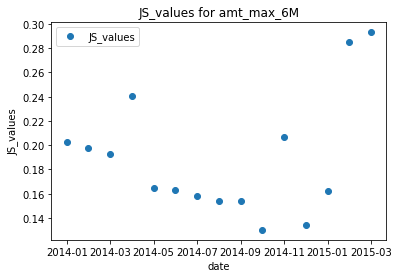

In [83]:
u_df.plot(x='date', y='JS_values', style='o')
plt.xlabel('date')
plt.ylabel('JS_values')
plt.title('JS_values for amt_max_6M')

## 2) amt_mean_12M

In [84]:
amt_mean_12M_baseline = X2['amt_mean_12M'].to_numpy()

In [85]:
amt_mean_12M_baseline = amt_mean_12M_baseline/amt_mean_12M_baseline.max()
amt_mean_12M_baseline

array([0.        , 0.        , 0.        , ..., 0.14882308, 0.14882308,
       0.11161731])

**Overll drift for all the months together**

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

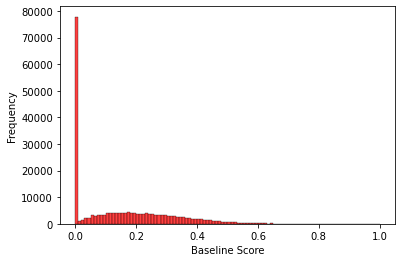

In [86]:
ax = sns.histplot(amt_mean_12M_baseline,                
                  color='red',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

In [87]:
amt_mean_12M_target = X3['amt_mean_12M'].to_numpy()
amt_mean_12M_target = amt_mean_12M_target/amt_mean_12M_target.max()

In [88]:
amt_mean_12M_target

array([0.15373459, 0.15373459, 0.07759246, ..., 0.05873822, 0.08339376,
       0.08339376])

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

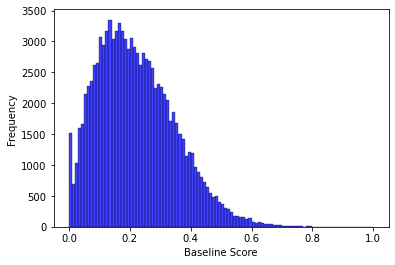

In [89]:
ax = sns.histplot(amt_mean_12M_target,                
                  color='blue',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

### To estimate the drift month over month

In [90]:
amt_mean_12M_baseline_df = pd.DataFrame(amt_mean_12M_baseline)
amt_mean_12M_baseline_df = amt_mean_12M_baseline_df.set_axis(['amt_mean_12M_baseline'], axis=1)

In [91]:
amt_mean_12M_target_df = pd.DataFrame(amt_mean_12M_target)
amt_mean_12M_target_df = amt_mean_12M_target_df.set_axis(['amt_mean_12M_target'], axis=1)

In [92]:
merge_df = X4.join(amt_mean_12M_baseline_df)
merge_df = merge_df.join(amt_mean_12M_target_df)

In [93]:
from datetime import datetime as dt
merge_df['date'] = pd.to_datetime(merge_df['ME_DT'])
merge_df['date'] = merge_df['date'].dt.strftime('%Y-%m')

In [94]:
merge_df = merge_df.apply(lambda x: x.fillna(0),axis=0)

In [95]:
merge_df = merge_df.drop(columns=['ME_DT'],axis=1)

In [96]:
merge_df = merge_df[['CLNT_NO','date', 'amt_mean_12M_baseline','amt_mean_12M_target']]

In [97]:
merge_df_train_test = merge_df.groupby(['date','CLNT_NO']).mean()

In [98]:
monthly_scores_train = merge_df_train_test['amt_mean_12M_baseline'].groupby(level=0).aggregate(np.histogram)
#monthly_scores_train

In [99]:
monthly_scores_train = pd.DataFrame(monthly_scores_train)

In [100]:
monthly_scores_test = merge_df_train_test['amt_mean_12M_target'].groupby(level=0).aggregate(np.histogram)
monthly_scores_test = pd.DataFrame(monthly_scores_test)
#monthly_scores_test

In [101]:
join_df = monthly_scores_train.join(monthly_scores_test)

In [102]:
u = join_df.apply(lambda x: x.str[0])
u

,amt_mean_12M_baseline,amt_mean_12M_target
date,,
2014-01,"[2565, 628, 1073, 1077, 819, 428, 205, 66, 16, 7]","[1117, 1945, 1746, 1224, 595, 195, 45, 13, 2, 2]"
2014-02,"[2582, 619, 1048, 1134, 790, 432, 184, 66, 22, 7]","[1029, 1780, 1693, 1253, 724, 278, 95, 24, 6, 2]"
2014-03,"[2611, 733, 1172, 1071, 762, 361, 125, 30, 15, 4]","[1232, 2033, 1768, 1139, 513, 158, 34, 6, 0, 1]"
2014-04,"[2595, 753, 1171, 1126, 699, 358, 126, 39, 15, 2]","[986, 1742, 1671, 1261, 735, 327, 117, 40, 4, 1]"
2014-05,"[2661, 1010, 1397, 1065, 513, 176, 47, 13, 1, 1]","[1131, 1927, 1673, 1233, 617, 217, 70, 14, 1, 1]"
2014-06,"[2625, 875, 1260, 1112, 661, 235, 84, 27, 4, 1]","[1031, 1718, 1693, 1316, 696, 295, 96, 33, 4, 2]"
2014-07,"[2649, 1026, 1376, 1026, 578, 161, 55, 12, 0, 1]","[999, 1733, 1680, 1280, 735, 307, 107, 35, 4, 4]"
2014-08,"[2637, 974, 1364, 1024, 600, 205, 63, 14, 2, 1]","[871, 1635, 1518, 1368, 841, 399, 168, 59, 18, 7]"
2014-09,"[2608, 888, 1322, 1079, 623, 255, 83, 20, 4, 2]","[912, 1753, 1574, 1316, 796, 360, 128, 29, 10, 6]"


In [103]:
for i in range(len(u)):
    u['JS_values'] = distance.jensenshannon(u['amt_mean_12M_baseline'].values[i],u['amt_mean_12M_target'].values[i],2.0)

In [104]:
for i in range(len(u)):
    u['JS_values'][i] = distance.jensenshannon(u['amt_mean_12M_baseline'].values[i],u['amt_mean_12M_target'].values[i],2.0)
u

,amt_mean_12M_baseline,amt_mean_12M_target,JS_values
date,,,
2014-01,"[2565, 628, 1073, 1077, 819, 428, 205, 66, 16, 7]","[1117, 1945, 1746, 1224, 595, 195, 45, 13, 2, 2]",0.303138
2014-02,"[2582, 619, 1048, 1134, 790, 432, 184, 66, 22, 7]","[1029, 1780, 1693, 1253, 724, 278, 95, 24, 6, 2]",0.283496
2014-03,"[2611, 733, 1172, 1071, 762, 361, 125, 30, 15, 4]","[1232, 2033, 1768, 1139, 513, 158, 34, 6, 0, 1]",0.279553
2014-04,"[2595, 753, 1171, 1126, 699, 358, 126, 39, 15, 2]","[986, 1742, 1671, 1261, 735, 327, 117, 40, 4, 1]",0.256764
2014-05,"[2661, 1010, 1397, 1065, 513, 176, 47, 13, 1, 1]","[1131, 1927, 1673, 1233, 617, 217, 70, 14, 1, 1]",0.226828
2014-06,"[2625, 875, 1260, 1112, 661, 235, 84, 27, 4, 1]","[1031, 1718, 1693, 1316, 696, 295, 96, 33, 4, 2]",0.238788
2014-07,"[2649, 1026, 1376, 1026, 578, 161, 55, 12, 0, 1]","[999, 1733, 1680, 1280, 735, 307, 107, 35, 4, 4]",0.241912
2014-08,"[2637, 974, 1364, 1024, 600, 205, 63, 14, 2, 1]","[871, 1635, 1518, 1368, 841, 399, 168, 59, 18, 7]",0.267060
2014-09,"[2608, 888, 1322, 1079, 623, 255, 83, 20, 4, 2]","[912, 1753, 1574, 1316, 796, 360, 128, 29, 10, 6]",0.255035


In [105]:
u_df = u.reset_index()

Text(0.5, 1.0, 'JS_values for amt_mean_12M')

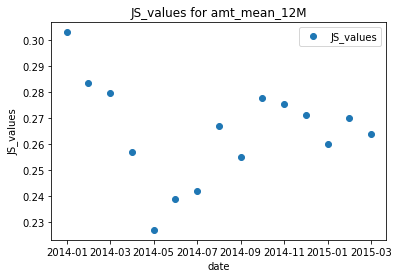

In [106]:
u_df.plot(x='date', y=['JS_values'], style='o')
plt.xlabel('date')
plt.ylabel('JS_values')
plt.title('JS_values for amt_mean_12M')

## 3) amt_mean_6M

In [107]:
amt_mean_6M_baseline = X2['amt_mean_6M'].to_numpy()

In [108]:
amt_mean_6M_baseline = amt_mean_6M_baseline/amt_mean_6M_baseline.max()
amt_mean_6M_baseline

array([0.        , 0.        , 0.        , ..., 0.16742597, 0.16742597,
       0.16742597])

**Overall drift for all the months together**

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

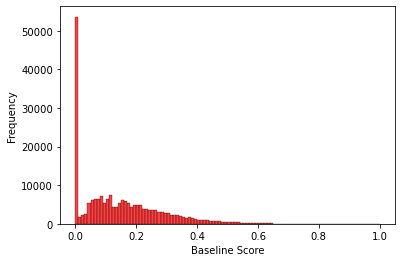

In [109]:
ax = sns.histplot(amt_mean_6M_baseline,                
                  color='red',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

In [110]:
amt_mean_6M_target = X3['amt_mean_6M'].to_numpy()
amt_mean_6M_target = amt_mean_6M_target/amt_mean_6M_target.max()

In [111]:
amt_mean_6M_target

array([0.08068182, 0.08068182, 0.08068182, ..., 0.03977273, 0.03863636,
       0.03863636])

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

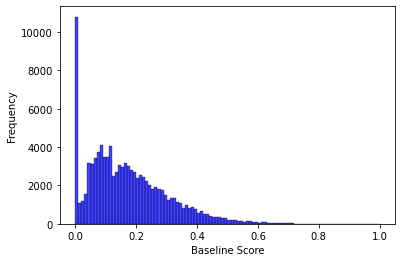

In [112]:
ax = sns.histplot(amt_mean_6M_target,                
                  color='blue',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

### To estimate the drift month over month

In [113]:
amt_mean_6M_baseline_df = pd.DataFrame(amt_mean_6M_baseline)
amt_mean_6M_baseline_df = amt_mean_6M_baseline_df.set_axis(['amt_mean_6M_baseline'], axis=1)

In [114]:
amt_mean_6M_target_df = pd.DataFrame(amt_mean_6M_target)
amt_mean_6M_target_df = amt_mean_6M_target_df.set_axis(['amt_mean_6M_target'], axis=1)

In [115]:
merge_df = X4.join(amt_mean_6M_baseline_df)
merge_df = merge_df.join(amt_mean_6M_target_df)

In [116]:
from datetime import datetime as dt
merge_df['date'] = pd.to_datetime(merge_df['ME_DT'])
merge_df['date'] = merge_df['date'].dt.strftime('%Y-%m')

In [117]:
merge_df = merge_df.apply(lambda x: x.fillna(0),axis=0)

In [118]:
merge_df = merge_df.drop(columns=['ME_DT'],axis=1)

In [119]:
merge_df = merge_df[['CLNT_NO','date', 'amt_mean_6M_baseline','amt_mean_6M_target']]

In [120]:
merge_df_train_test = merge_df.groupby(['date','CLNT_NO']).mean()

In [121]:
monthly_scores_train = merge_df_train_test['amt_mean_6M_baseline'].groupby(level=0).aggregate(np.histogram)
#monthly_scores_train

In [122]:
monthly_scores_train = pd.DataFrame(monthly_scores_train)

In [123]:
monthly_scores_test = merge_df_train_test['amt_mean_6M_target'].groupby(level=0).aggregate(np.histogram)
monthly_scores_test = pd.DataFrame(monthly_scores_test)
#monthly_scores_test

In [124]:
join_df = monthly_scores_train.join(monthly_scores_test)

In [125]:
u = join_df.apply(lambda x: x.str[0])
u

,amt_mean_6M_baseline,amt_mean_6M_target
date,,
2014-01,"[2173, 1504, 1372, 985, 492, 237, 79, 32, 7, 3]","[1882, 1812, 1426, 919, 479, 220, 93, 32, 14, 7]"
2014-02,"[2303, 1593, 1431, 871, 437, 166, 61, 18, 2, 2]","[2114, 1882, 1472, 767, 389, 171, 67, 15, 4, 3]"
2014-03,"[2210, 1511, 1366, 954, 517, 208, 76, 30, 10, 2]","[2165, 1896, 1444, 789, 376, 146, 48, 15, 2, 3]"
2014-04,"[2202, 1513, 1427, 926, 497, 205, 75, 22, 13, 4]","[2197, 1917, 1386, 818, 373, 127, 45, 16, 2, 3]"
2014-05,"[2341, 1697, 1381, 869, 397, 142, 34, 14, 8, 1]","[1918, 1763, 1475, 886, 469, 212, 106, 37, 15, 3]"
2014-06,"[2297, 1496, 1432, 905, 481, 189, 57, 21, 3, 3]","[1980, 1776, 1473, 856, 470, 192, 86, 33, 13, 5]"
2014-07,"[2291, 1587, 1373, 919, 451, 179, 60, 15, 6, 3]","[1960, 1844, 1400, 859, 492, 195, 79, 34, 16, 5]"
2014-08,"[2284, 1588, 1387, 896, 451, 176, 77, 17, 5, 3]","[1870, 1785, 1427, 881, 511, 269, 84, 31, 19, 7]"
2014-09,"[2267, 1583, 1379, 902, 464, 193, 67, 20, 7, 2]","[2042, 1910, 1356, 836, 459, 177, 64, 27, 8, 5]"


In [126]:
for i in range(len(u)):
    u['JS_values'] = distance.jensenshannon(u['amt_mean_6M_baseline'].values[i],u['amt_mean_6M_target'].values[i],2.0)

In [127]:
for i in range(len(u)):
    u['JS_values'][i] = distance.jensenshannon(u['amt_mean_6M_baseline'].values[i],u['amt_mean_6M_target'].values[i],2.0)
u

,amt_mean_6M_baseline,amt_mean_6M_target,JS_values
date,,,
2014-01,"[2173, 1504, 1372, 985, 492, 237, 79, 32, 7, 3]","[1882, 1812, 1426, 919, 479, 220, 93, 32, 14, 7]",0.055529
2014-02,"[2303, 1593, 1431, 871, 437, 166, 61, 18, 2, 2]","[2114, 1882, 1472, 767, 389, 171, 67, 15, 4, 3]",0.047816
2014-03,"[2210, 1511, 1366, 954, 517, 208, 76, 30, 10, 2]","[2165, 1896, 1444, 789, 376, 146, 48, 15, 2, 3]",0.076821
2014-04,"[2202, 1513, 1427, 926, 497, 205, 75, 22, 13, 4]","[2197, 1917, 1386, 818, 373, 127, 45, 16, 2, 3]",0.075540
2014-05,"[2341, 1697, 1381, 869, 397, 142, 34, 14, 8, 1]","[1918, 1763, 1475, 886, 469, 212, 106, 37, 15, 3]",0.079079
2014-06,"[2297, 1496, 1432, 905, 481, 189, 57, 21, 3, 3]","[1980, 1776, 1473, 856, 470, 192, 86, 33, 13, 5]",0.058561
2014-07,"[2291, 1587, 1373, 919, 451, 179, 60, 15, 6, 3]","[1960, 1844, 1400, 859, 492, 195, 79, 34, 16, 5]",0.058453
2014-08,"[2284, 1588, 1387, 896, 451, 176, 77, 17, 5, 3]","[1870, 1785, 1427, 881, 511, 269, 84, 31, 19, 7]",0.069300
2014-09,"[2267, 1583, 1379, 902, 464, 193, 67, 20, 7, 2]","[2042, 1910, 1356, 836, 459, 177, 64, 27, 8, 5]",0.050326


In [128]:
u_df = u.reset_index()

Text(0.5, 1.0, 'JS_values for amt_mean_6M')

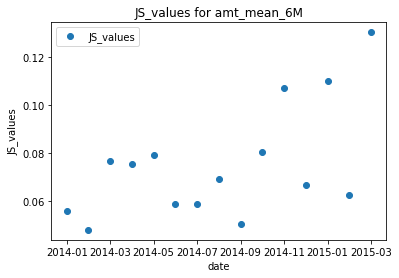

In [129]:
u_df.plot(x='date', y=['JS_values'], style='o')
plt.xlabel('date')
plt.ylabel('JS_values')
plt.title('JS_values for amt_mean_6M')

## 4) amt_max_12M

In [130]:
amt_max_12M_baseline = X2['amt_max_12M'].to_numpy()

In [131]:
amt_max_12M_baseline = amt_max_12M_baseline/amt_max_12M_baseline.max()
amt_max_12M_baseline

array([0.        , 0.        , 0.        , ..., 0.18357488, 0.18357488,
       0.18357488])

**Overall drift for all the months together**

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

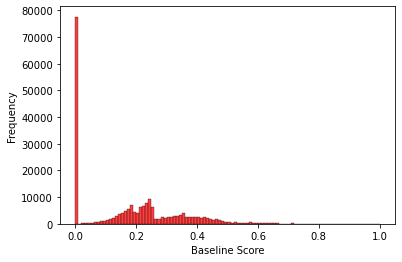

In [132]:
ax = sns.histplot(amt_max_12M_baseline,                
                  color='red',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

In [133]:
amt_max_12M_target = X3['amt_max_12M'].to_numpy()
amt_max_12M_target = amt_max_12M_target/amt_max_12M_target.max()

In [134]:
amt_max_12M_target

array([0.22826087, 0.22826087, 0.15434783, ..., 0.07608696, 0.07608696,
       0.07608696])

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

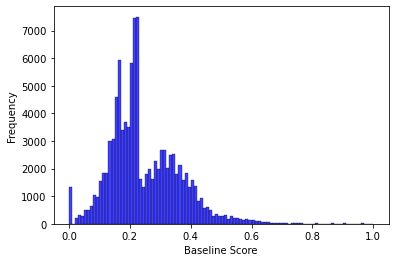

In [135]:
ax = sns.histplot(amt_max_12M_target,                
                  color='blue',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

### To estimate the drift month over month

In [136]:
amt_max_12M_baseline_df = pd.DataFrame(amt_max_12M_baseline)
amt_max_12M_baseline_df = amt_mean_6M_baseline_df.set_axis(['amt_max_12M_baseline'], axis=1)

In [137]:
amt_max_12M_target_df = pd.DataFrame(amt_max_12M_target)
amt_max_12M_target_df = amt_max_12M_target_df.set_axis(['amt_max_12M_target'], axis=1)

In [138]:
merge_df = X4.join(amt_max_12M_baseline_df)
merge_df = merge_df.join(amt_max_12M_target_df)

In [139]:
from datetime import datetime as dt
merge_df['date'] = pd.to_datetime(merge_df['ME_DT'])
merge_df['date'] = merge_df['date'].dt.strftime('%Y-%m')

In [140]:
merge_df = merge_df.apply(lambda x: x.fillna(0),axis=0)

In [141]:
merge_df = merge_df.drop(columns=['ME_DT'],axis=1)

In [142]:
merge_df = merge_df[['CLNT_NO','date', 'amt_max_12M_baseline','amt_max_12M_target']]

In [143]:
merge_df_train_test = merge_df.groupby(['date','CLNT_NO']).mean()

In [144]:
monthly_scores_train = merge_df_train_test['amt_max_12M_baseline'].groupby(level=0).aggregate(np.histogram)
#monthly_scores_train

In [145]:
monthly_scores_train = pd.DataFrame(monthly_scores_train)

In [146]:
monthly_scores_test = merge_df_train_test['amt_max_12M_target'].groupby(level=0).aggregate(np.histogram)
monthly_scores_test = pd.DataFrame(monthly_scores_test)
#monthly_scores_test

In [147]:
join_df = monthly_scores_train.join(monthly_scores_test)

In [148]:
u = join_df.apply(lambda x: x.str[0])
u

,amt_max_12M_baseline,amt_max_12M_target
date,,
2014-01,"[2173, 1504, 1372, 985, 492, 237, 79, 32, 7, 3]","[299, 1785, 2267, 1381, 807, 197, 107, 29, 10, 2]"
2014-02,"[2303, 1593, 1431, 871, 437, 166, 61, 18, 2, 2]","[319, 1754, 2299, 1359, 811, 201, 104, 26, 9, 2]"
2014-03,"[2210, 1511, 1366, 954, 517, 208, 76, 30, 10, 2]","[327, 1727, 2282, 1392, 813, 206, 100, 26, 8, 3]"
2014-04,"[2202, 1513, 1427, 926, 497, 205, 75, 22, 13, 4]","[365, 1966, 2241, 1436, 626, 160, 61, 24, 2, 3]"
2014-05,"[2341, 1697, 1381, 869, 397, 142, 34, 14, 8, 1]","[373, 1996, 2233, 1431, 619, 150, 55, 23, 1, 3]"
2014-06,"[2297, 1496, 1432, 905, 481, 189, 57, 21, 3, 3]","[373, 1979, 2266, 1437, 592, 152, 56, 23, 1, 5]"
2014-07,"[2291, 1587, 1373, 919, 451, 179, 60, 15, 6, 3]","[373, 1949, 2273, 1449, 603, 160, 50, 21, 1, 5]"
2014-08,"[2284, 1588, 1387, 896, 451, 176, 77, 17, 5, 3]","[365, 1980, 2271, 1437, 591, 160, 53, 21, 1, 5]"
2014-09,"[2267, 1583, 1379, 902, 464, 193, 67, 20, 7, 2]","[361, 1993, 2256, 1435, 594, 160, 55, 24, 1, 5]"


In [149]:
for i in range(len(u)):
    u['JS_values'] = distance.jensenshannon(u['amt_max_12M_baseline'].values[i],u['amt_max_12M_target'].values[i],2.0)

In [150]:
for i in range(len(u)):
    u['JS_values'][i] = distance.jensenshannon(u['amt_max_12M_baseline'].values[i],u['amt_max_12M_target'].values[i],2.0)
u

,amt_max_12M_baseline,amt_max_12M_target,JS_values
date,,,
2014-01,"[2173, 1504, 1372, 985, 492, 237, 79, 32, 7, 3]","[299, 1785, 2267, 1381, 807, 197, 107, 29, 10, 2]",0.323904
2014-02,"[2303, 1593, 1431, 871, 437, 166, 61, 18, 2, 2]","[319, 1754, 2299, 1359, 811, 201, 104, 26, 9, 2]",0.335427
2014-03,"[2210, 1511, 1366, 954, 517, 208, 76, 30, 10, 2]","[327, 1727, 2282, 1392, 813, 206, 100, 26, 8, 3]",0.321010
2014-04,"[2202, 1513, 1427, 926, 497, 205, 75, 22, 13, 4]","[365, 1966, 2241, 1436, 626, 160, 61, 24, 2, 3]",0.310711
2014-05,"[2341, 1697, 1381, 869, 397, 142, 34, 14, 8, 1]","[373, 1996, 2233, 1431, 619, 150, 55, 23, 1, 3]",0.325239
2014-06,"[2297, 1496, 1432, 905, 481, 189, 57, 21, 3, 3]","[373, 1979, 2266, 1437, 592, 152, 56, 23, 1, 5]",0.318647
2014-07,"[2291, 1587, 1373, 919, 451, 179, 60, 15, 6, 3]","[373, 1949, 2273, 1449, 603, 160, 50, 21, 1, 5]",0.319305
2014-08,"[2284, 1588, 1387, 896, 451, 176, 77, 17, 5, 3]","[365, 1980, 2271, 1437, 591, 160, 53, 21, 1, 5]",0.320586
2014-09,"[2267, 1583, 1379, 902, 464, 193, 67, 20, 7, 2]","[361, 1993, 2256, 1435, 594, 160, 55, 24, 1, 5]",0.319672


In [151]:
u_df = u.reset_index()

Text(0.5, 1.0, 'JS_values for amt_max_12M')

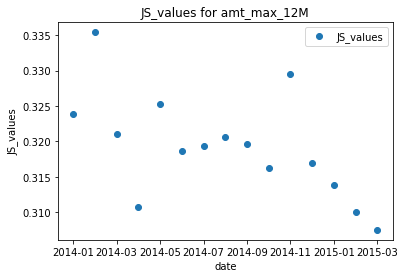

In [152]:
u_df.plot(x='date', y=['JS_values'], style='o')
plt.xlabel('date')
plt.ylabel('JS_values')
plt.title('JS_values for amt_max_12M')

## 5) amt_sum_6M

In [153]:
amt_sum_6M_baseline = X2['amt_sum_6M'].to_numpy()

In [154]:
amt_sum_6M_baseline = amt_sum_6M_baseline/amt_sum_6M_baseline.max()
amt_sum_6M_baseline

array([0.        , 0.        , 0.        , ..., 0.16742597, 0.16742597,
       0.16742597])

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

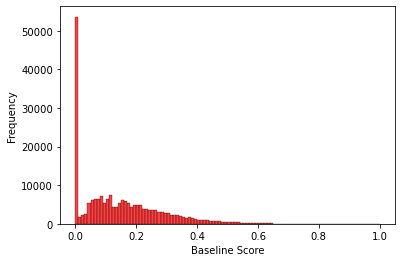

In [155]:
ax = sns.histplot(amt_sum_6M_baseline,                
                  color='red',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

In [156]:
amt_sum_6M_target = X3['amt_sum_6M'].to_numpy()
amt_sum_6M_target = amt_sum_6M_target/amt_sum_6M_target.max()

In [157]:
amt_sum_6M_target

array([0.08068182, 0.08068182, 0.08068182, ..., 0.03977273, 0.03863636,
       0.03863636])

[Text(0.5, 0, 'Baseline Score'), Text(0, 0.5, 'Frequency')]

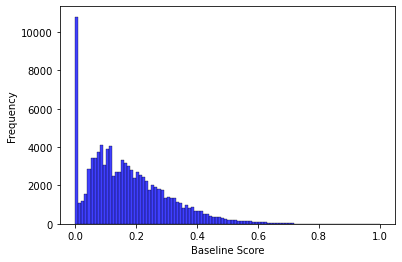

In [158]:
ax = sns.histplot(amt_sum_6M_target,                
                  color='blue',
                  bins=100)
ax.set(xlabel='Baseline Score', ylabel='Frequency')

### To estimate the drift month over month

In [159]:
amt_sum_6M_baseline_df = pd.DataFrame(amt_sum_6M_baseline)
amt_sum_6M_baseline_df = amt_sum_6M_baseline_df.set_axis(['amt_sum_6M_baseline'], axis=1)

In [160]:
amt_sum_6M_target_df = pd.DataFrame(amt_sum_6M_target)
amt_sum_6M_target_df = amt_sum_6M_target_df.set_axis(['amt_sum_6M_target'], axis=1)

In [161]:
merge_df = X4.join(amt_sum_6M_baseline_df)
merge_df = merge_df.join(amt_sum_6M_target_df)

In [162]:
from datetime import datetime as dt
merge_df['date'] = pd.to_datetime(merge_df['ME_DT'])
merge_df['date'] = merge_df['date'].dt.strftime('%Y-%m')

In [163]:
merge_df = merge_df.apply(lambda x: x.fillna(0),axis=0)

In [164]:
merge_df = merge_df.drop(columns=['ME_DT'],axis=1)

In [165]:
merge_df = merge_df[['CLNT_NO','date', 'amt_sum_6M_baseline','amt_sum_6M_target']]

In [166]:
merge_df_train_test = merge_df.groupby(['date','CLNT_NO']).mean()

In [167]:
monthly_scores_train = merge_df_train_test['amt_sum_6M_baseline'].groupby(level=0).aggregate(np.histogram)
#monthly_scores_train

In [168]:
monthly_scores_train = pd.DataFrame(monthly_scores_train)

In [169]:
monthly_scores_test = merge_df_train_test['amt_sum_6M_target'].groupby(level=0).aggregate(np.histogram)
monthly_scores_test = pd.DataFrame(monthly_scores_test)
#monthly_scores_test

In [170]:
join_df = monthly_scores_train.join(monthly_scores_test)

In [171]:
u = join_df.apply(lambda x: x.str[0])
u

,amt_sum_6M_baseline,amt_sum_6M_target
date,,
2014-01,"[2173, 1504, 1372, 985, 498, 231, 79, 32, 7, 3]","[1882, 1812, 1426, 919, 479, 220, 93, 32, 14, 7]"
2014-02,"[2303, 1593, 1431, 871, 437, 166, 61, 18, 2, 2]","[2114, 1882, 1472, 767, 389, 171, 67, 15, 4, 3]"
2014-03,"[2210, 1511, 1366, 954, 517, 208, 76, 30, 10, 2]","[2165, 1896, 1444, 789, 376, 146, 48, 15, 2, 3]"
2014-04,"[2202, 1513, 1427, 926, 497, 205, 75, 22, 13, 4]","[2197, 1917, 1386, 818, 373, 127, 45, 16, 2, 3]"
2014-05,"[2341, 1697, 1381, 869, 397, 142, 34, 14, 8, 1]","[1918, 1763, 1475, 886, 469, 212, 106, 37, 15, 3]"
2014-06,"[2297, 1496, 1432, 905, 481, 189, 57, 21, 3, 3]","[1980, 1776, 1473, 856, 470, 192, 86, 33, 13, 5]"
2014-07,"[2291, 1587, 1373, 919, 451, 179, 60, 15, 6, 3]","[1960, 1844, 1400, 859, 492, 195, 79, 34, 16, 5]"
2014-08,"[2284, 1588, 1387, 896, 451, 176, 77, 17, 5, 3]","[1870, 1785, 1427, 881, 511, 269, 84, 31, 19, 7]"
2014-09,"[2267, 1583, 1379, 902, 464, 193, 67, 20, 7, 2]","[2042, 1910, 1356, 836, 459, 177, 64, 27, 8, 5]"


In [172]:
for i in range(len(u)):
    u['JS_values'] = distance.jensenshannon(u['amt_sum_6M_baseline'].values[i],u['amt_sum_6M_target'].values[i],2.0)

In [173]:
for i in range(len(u)):
    u['JS_values'][i] = distance.jensenshannon(u['amt_sum_6M_baseline'].values[i],u['amt_sum_6M_target'].values[i],2.0)
u

,amt_sum_6M_baseline,amt_sum_6M_target,JS_values
date,,,
2014-01,"[2173, 1504, 1372, 985, 498, 231, 79, 32, 7, 3]","[1882, 1812, 1426, 919, 479, 220, 93, 32, 14, 7]",0.055449
2014-02,"[2303, 1593, 1431, 871, 437, 166, 61, 18, 2, 2]","[2114, 1882, 1472, 767, 389, 171, 67, 15, 4, 3]",0.047816
2014-03,"[2210, 1511, 1366, 954, 517, 208, 76, 30, 10, 2]","[2165, 1896, 1444, 789, 376, 146, 48, 15, 2, 3]",0.076821
2014-04,"[2202, 1513, 1427, 926, 497, 205, 75, 22, 13, 4]","[2197, 1917, 1386, 818, 373, 127, 45, 16, 2, 3]",0.075540
2014-05,"[2341, 1697, 1381, 869, 397, 142, 34, 14, 8, 1]","[1918, 1763, 1475, 886, 469, 212, 106, 37, 15, 3]",0.079079
2014-06,"[2297, 1496, 1432, 905, 481, 189, 57, 21, 3, 3]","[1980, 1776, 1473, 856, 470, 192, 86, 33, 13, 5]",0.058561
2014-07,"[2291, 1587, 1373, 919, 451, 179, 60, 15, 6, 3]","[1960, 1844, 1400, 859, 492, 195, 79, 34, 16, 5]",0.058453
2014-08,"[2284, 1588, 1387, 896, 451, 176, 77, 17, 5, 3]","[1870, 1785, 1427, 881, 511, 269, 84, 31, 19, 7]",0.069300
2014-09,"[2267, 1583, 1379, 902, 464, 193, 67, 20, 7, 2]","[2042, 1910, 1356, 836, 459, 177, 64, 27, 8, 5]",0.050326


In [174]:
u_df = u.reset_index()

Text(0.5, 1.0, 'JS_values for amt_sum_6M')

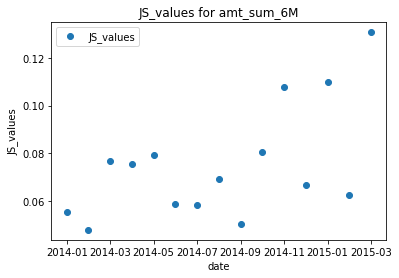

In [175]:
u_df.plot(x='date', y=['JS_values'], style='o')
plt.xlabel('date')
plt.ylabel('JS_values')
plt.title('JS_values for amt_sum_6M')

### Comments

1) The top 5 features were extracted from the feature importance graph and drift analysis was done for each.<br>
2) The drift values were calculated using the Jensen-Shannon diveregence metric.<br>
3) The feature which caused the maximum drift wass amt_max_12M which has a drift value of 0.3 for all the months after 2013.<br>
4) The feature which caused the least drift among the top 5 features were "amt_sum_6M" and "amt_mean_6M". Both had drift values between 0.04-0.06 which is almost negligible.<br>
5) If the JS values are close to 0, there is not much difference in the distributions.<br>
6) If the JS values are > 0.2, the distributions are very different.<br>